In [1]:
import zipfile
# Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(12)

traindir = "./pizza_steak/train"
valdir = "./pizza_steak/test"
preddir = "./pizza_steak/predict"

# idgtrain = ImageDataGenerator(rescale = 1./255, 
#                               horizontal_flip=True 
#                               )
# idgval   = ImageDataGenerator(rescale = 1./255)
# idgpred = ImageDataGenerator(rescale = 1./255)

idgtrain = ImageDataGenerator()
idgval   = ImageDataGenerator()
idgpred  = ImageDataGenerator()

traindata = idgtrain.flow_from_directory(directory = traindir, target_size = (224,224), class_mode = 'binary')
valdata = idgtrain.flow_from_directory(directory = valdir, target_size = (224,224), class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [3]:
for a, b in traindata:
    print(a.shape,b.shape)
    break

(32, 224, 224, 3) (32,)


In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

tf.keras.backend.clear_session()
model = Sequential([
    tf.keras.layers.Rescaling(scale=1./255, offset=0.0),
    Conv2D(filters = 10,
           kernel_size = 3,
           strides=1,
           activation = 'relu',
           input_shape = (224,224,3)),
    Flatten(),
    Dense(10, activation = 'relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                              patience=5, 
                              min_delta=0.001,
                              min_lr=0.00001)

earlystopping = EarlyStopping(monitor='val_accuracy',
                             min_delta=0.005,
                             patience=10)

filepath='./my_pizza_model.h5'
modelcheckpoint = ModelCheckpoint(filepath=filepath, save_best_only=True)

callbacks=[reduce_lr,earlystopping, modelcheckpoint]

In [24]:
history = model.fit(traindata, epochs = 50, validation_data = valdata, callbacks=callbacks)

Epoch 1/50
47/47 [==============================] - 12s 242ms/step - loss: 1.5749 - accuracy: 0.5980 - val_loss: 0.6817 - val_accuracy: 0.5020 - lr: 0.0010
Epoch 2/50
47/47 [==============================] - 15s 328ms/step - loss: 0.6585 - accuracy: 0.5740 - val_loss: 0.5369 - val_accuracy: 0.8040 - lr: 0.0010
Epoch 3/50
47/47 [==============================] - 15s 318ms/step - loss: 0.5498 - accuracy: 0.7773 - val_loss: 0.5222 - val_accuracy: 0.8260 - lr: 0.0010
Epoch 4/50
47/47 [==============================] - 15s 325ms/step - loss: 0.4480 - accuracy: 0.8240 - val_loss: 0.3724 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 5/50
47/47 [==============================] - 15s 322ms/step - loss: 0.2638 - accuracy: 0.8920 - val_loss: 0.3909 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 6/50
47/47 [==============================] - 15s 314ms/step - loss: 0.1040 - accuracy: 0.9633 - val_loss: 0.3779 - val_accuracy: 0.8280 - lr: 0.0010
Epoch 7/50
47/47 [==============================] - 15s 311ms/st

In [17]:
history = model.fit(traindata, epochs = 5, validation_data = valdata)

Epoch 1/5
47/47 [==============================] - 11s 232ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 2/5
47/47 [==============================] - 13s 267ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/5
47/47 [==============================] - 14s 292ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/5
47/47 [==============================] - 14s 301ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 5/5
47/47 [==============================] - 14s 305ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4980


In [31]:
preddata = idgtrain.flow_from_directory(directory = preddir, target_size = (224,224), class_mode = None, shuffle = False)

Found 10 images belonging to 1 classes.


<AxesSubplot:>

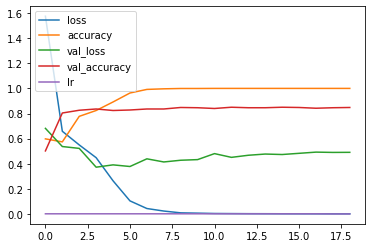

In [25]:
pd.DataFrame(history.history).plot()

<AxesSubplot:>

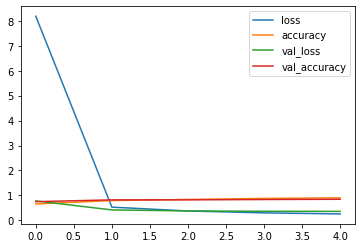

In [9]:
pd.DataFrame(history.history).plot()

In [32]:
preddata.reset()
ypred = bestmodel.predict(preddata)
print(ypred)

import numpy as np
predicted_class_indices=tf.round(ypred)
print(predicted_class_indices)
labels = (traindata.class_indices)
print(labels)
print(labels.items())
flip_labels = dict((v,k) for k,v in labels.items()) # converts {'pizza':0} to {0:'pizza'}

predictions = [flip_labels[int(k)] for k in predicted_class_indices]
predictions

[[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
{'pizza': 0, 'steak': 1}
dict_items([('pizza', 0), ('steak', 1)])


['steak',
 'steak',
 'steak',
 'pizza',
 'pizza',
 'pizza',
 'pizza',
 'pizza',
 'pizza',
 'pizza']

In [11]:
model.save("model_final1")

INFO:tensorflow:Assets written to: model_final1\assets


In [26]:
bestmodel = tf.keras.models.load_model("model_final.h5")
bestmodel.predict(preddata)

array([[0.38094193],
       [0.9692935 ],
       [0.22192076],
       [0.9955939 ],
       [0.00246817],
       [0.00497407],
       [0.9958381 ],
       [0.87503195],
       [0.01655918],
       [0.00249484]], dtype=float32)